In [222]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import pandas as pd

#img = cv2.imread('black_tshirt.jpg')
img = cv2.imread('womendress.jpg')
height, width, dim = img.shape

img = img[int((height/4)):int((2*height/4)), int((width/4)):int((3*width/4)), :]
height, width, dim = img.shape

window_name = 'image'
cv2.imshow(window_name,img)
cv2.waitKey(0)  

img_vec = np.reshape(img, [height * width, dim] )

kmeans = KMeans(n_clusters=3)
kmeans.fit( img_vec )

unique_l, counts_l = np.unique(kmeans.labels_, return_counts=True)
sort_ix = np.argsort(counts_l)
sort_ix = sort_ix[::-1]



KMeans(n_clusters=3)

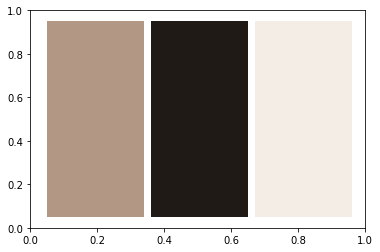

In [230]:
df=pd.read_csv('knn_color.csv')
knn1=df.drop('Y_label',axis=1)
X=knn1.drop('Y',axis=1)
Y=knn1['Y']

list1=list(df['Y'])
list2=list(df['Y_label'])

res = {} 
for key in list1: 
    for value in list2: 
        res[key] = value 
        list2.remove(value) 
        break  


In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

estimators = []
estimators.append(('knn', KNeighborsClassifier(n_neighbors = 1)))
model = Pipeline(estimators)
model.fit(X, Y)
Predicted_Class = model.predict(X)
np.mean(Y == Predicted_Class )

1.0

In [238]:
df_test=pd.DataFrame(np.array(kmeans.cluster_centers_[0],int).reshape(1,-1))
df_test1=pd.DataFrame()
df_test1['x1']=df_test[2]
df_test1['x2']=df_test[1]
df_test1['x3']=df_test[0]

Y1=int(model.predict(df_test1))
res[Y1]


'Black'